
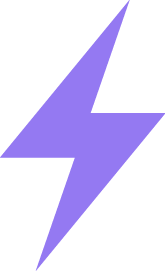

Running local mode, some functionality limited.



Country Code      2015        city  city_ascii      lat      lng  country  \
0          ABW  104000.0  Oranjestad  Oranjestad  12.5304 -70.0290    Aruba   
1          AND   70000.0      Ordino      Ordino  42.5563   1.5327  Andorra   
2          AND   70000.0  La Massana  La Massana  42.5434   1.5148  Andorra   
3          AND   70000.0     Canillo     Canillo  42.5670   1.5981  Andorra   
4          AND   70000.0     Andorra     Andorra  42.5000   1.5165  Andorra   

  iso2 iso3        admin_name  capital  population          id  
0   AW  ABW               NaN  primary     68775.0  1533513057  
1   AD  AND            Ordino    admin         NaN  1020655238  
2   AD  AND        La Massana    admin         NaN  1020543453  
3   AD  AND           Canillo    admin         NaN  1020594179  
4   AD  AND  Andorra la Vella  primary     53998.0  1020828846

In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import lonlat, distance, geodesic
import os
import tarfile
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    return plt.show()
pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2.csv') #from https://github.com/dphuang2/streamsets_scripts/blob/master/IM-testing/origin/API_SP.POP.TOTL_DS2_en_csv_v2.csv
latlong = pd.read_csv('simplemaps_worldcities_basicv1.5/worldcities.csv') #from https://simplemaps.com/data/world-cities
pop = pop[['Country Code','2015']]
df = pd.merge(pop, latlong, left_on='Country Code', right_on='iso3')
def city(x):
    return pd.concat([df5[df5['1']==x],
         df5[df5['0']==x]]).sort_values('power',ascending=False)
pd.options.display.max_columns=909
df.head()

In [2]:
# https://simplemaps.com/data/world-cities
# https://github.com/dphuang2/streamsets_scripts/blob/master/IM-testing/origin/API_SP.POP.TOTL_DS2_en_csv_v2.csv
pop = pd.read_csv('../API_SP.POP.TOTL_DS2_en_csv_v2.csv')
latlong = pd.read_csv('../simplemaps-worldcities-basic.csv')
pop = pop[['Country Code','2016']]
df = pd.merge(pop, latlong, left_on='Country Code', right_on='iso3')
df.index = df['city'] + ', ' + df['country']
df = df[df['Country Code'] == 'AUS'].reset_index()
#df = df[df['Country Code'].isin(['USA','CAN','MEX'])].reset_index()
df2 = pd.concat([pd.concat([df[df.index == 0]]*df.shape[0]).reset_index().add_suffix('_x'), df], 1, sort=False).reset_index()
for n in list(range(0, df.shape[0])):
    df3 = pd.concat([pd.concat([df[df.index == n]]*df.shape[0]).reset_index().add_suffix('_x'), df], 1)
    df2 = pd.concat([df2, df3], sort=False)
df = df2.drop('level_0', 1).reset_index()
df['combined_pop'] = df['pop']+df['pop_x']
df = df.sort_values(by='pop', ascending = False).sort_values(by='combined_pop', ascending = False)

In [3]:
df

level_0  level_0_x                      index_x Country Code_x  \
50399      223        223            Sydney, Australia            AUS   
50175      223        222         Melbourne, Australia            AUS   
50398      222        223            Sydney, Australia            AUS   
50395      219        223            Sydney, Australia            AUS   
49503      223        219          Brisbane, Australia            AUS   
...        ...        ...                          ...            ...   
30759       71        136          Erldunda, Australia            AUS   
30694        6        136          Erldunda, Australia            AUS   
30824      136        136          Erldunda, Australia            AUS   
1574         6          6  Newcastle Waters, Australia            AUS   
1704       136          6  Newcastle Waters, Australia            AUS   

           2016_x            city_x      city_ascii_x      lat_x       lng_x  \
50399  24127159.0            Sydney            Sydney -33.920011  151.185180   
50175  24127159.0         Melbourne         Melbourne -37.820031  144.975016   
50398  24127159.0            Sydney            Sydney -33.920011  151.185180   
50395  24127159.0            Sydney            Sydney -33.920011  151.185180   
49503  24127159.0          Brisbane          Brisbane -27.455031  153.035093   
...           ...               ...               ...        ...         ...   
30759  24127159.0          Erldunda          Erldunda -25.233306  133.199973   
30694  24127159.0          Erldunda          Erldunda -25.233306  133.199973   
30824  24127159.0          Erldunda          Erldunda -25.233306  133.199973   
1574   24127159.0  Newcastle Waters  Newcastle Waters -17.552793  133.467243   
1704   24127159.0  Newcastle Waters  Newcastle Waters -17.552793  133.467243   

           pop_x  country_x iso2_x iso3_x          province_x  \
50399  4135711.0  Australia     AU    AUS     New South Wales   
50175  2131812.5  Australia     AU    AUS            Victoria   
50398  4135711.0  Australia     AU    AUS     New South Wales   
50395  4135711.0  Australia     AU    AUS     New South Wales   
49503  1393176.5  Australia     AU    AUS          Queensland   
...          ...        ...    ...    ...                 ...   
30759       10.0  Australia     AU    AUS  Northern Territory   
30694       10.0  Australia     AU    AUS  Northern Territory   
30824       10.0  Australia     AU    AUS  Northern Territory   
1574        10.0  Australia     AU    AUS  Northern Territory   
1704        10.0  Australia     AU    AUS  Northern Territory   

                             index Country Code        2016              city  \
50399            Sydney, Australia          AUS  24127159.0            Sydney   
50175            Sydney, Australia          AUS  24127159.0            Sydney   
50398         Melbourne, Australia          AUS  24127159.0         Melbourne   
50395          Brisbane, Australia          AUS  24127159.0          Brisbane   
49503            Sydney, Australia          AUS  24127159.0            Sydney   
...                            ...          ...         ...               ...   
30759         Kingoonya, Australia          AUS  24127159.0         Kingoonya   
30694  Newcastle Waters, Australia          AUS  24127159.0  Newcastle Waters   
30824          Erldunda, Australia          AUS  24127159.0          Erldunda   
1574   Newcastle Waters, Australia          AUS  24127159.0  Newcastle Waters   
1704           Erldunda, Australia          AUS  24127159.0          Erldunda   

             city_ascii        lat         lng        pop    country iso2  \
50399            Sydney -33.920011  151.185180  4135711.0  Australia   AU   
50175            Sydney -33.920011  151.185180  4135711.0  Australia   AU   
50398         Melbourne -37.820031  144.975016  2131812.5  Australia   AU   
50395          Brisbane -27.455031  153.035093  1393176.5  Australia   AU   
49503            Sydney -33.92

In [4]:
df.shape

(50400, 27)

In [5]:
df = df.drop('level_0',1).dropna(subset=['lat','lat_x']).reset_index()
df['distance'] = [geodesic(lonlat(df['lng'][x], df['lat'][x]), lonlat(df['lng_x'][x], df['lat_x'][x])).km for x in range(df.shape[0])]
df = df[df['distance'] > 0]
df['power'] = df['combined_pop'] / df['distance']
df = df[df['distance'] > 0]
df.head()

level_0  level_0_x               index_x Country Code_x      2016_x  \
1    50175        222  Melbourne, Australia            AUS  24127159.0   
2    50398        223     Sydney, Australia            AUS  24127159.0   
3    50395        223     Sydney, Australia            AUS  24127159.0   
4    49503        219   Brisbane, Australia            AUS  24127159.0   
5    49951        221      Perth, Australia            AUS  24127159.0   

      city_x city_ascii_x      lat_x       lng_x      pop_x  country_x iso2_x  \
1  Melbourne    Melbourne -37.820031  144.975016  2131812.5  Australia     AU   
2     Sydney       Sydney -33.920011  151.185180  4135711.0  Australia     AU   
3     Sydney       Sydney -33.920011  151.185180  4135711.0  Australia     AU   
4   Brisbane     Brisbane -27.455031  153.035093  1393176.5  Australia     AU   
5      Perth        Perth -31.955015  115.839999  1206108.0  Australia     AU   

  iso3_x         province_x                 index Country Code        2016  \
1    AUS           Victoria     Sydney, Australia          AUS  24127159.0   
2    AUS    New South Wales  Melbourne, Australia          AUS  24127159.0   
3    AUS    New South Wales   Brisbane, Australia          AUS  24127159.0   
4    AUS         Queensland     Sydney, Australia          AUS  24127159.0   
5    AUS  Western Australia     Sydney, Australia          AUS  24127159.0   

        city city_ascii        lat         lng        pop    country iso2  \
1     Sydney     Sydney -33.920011  151.185180  4135711.0  Australia   AU   
2  Melbourne  Melbourne -37.820031  144.975016  2131812.5  Australia   AU   
3   Brisbane   Brisbane -27.455031  153.035093  1393176.5  Australia   AU   
4     Sydney     Sydney -33.920011  151.185180  4135711.0  Australia   AU   
5     Sydney     Sydney -33.920011  151.185180  4135711.0  Australia   AU   

  iso3         province  combined_pop     distance        power  
1  AUS  New South Wales     6267523.5   708.089911  8851.310268  
2  AUS         Victoria     6267523.5   708.089911  8851.310268  
3  AUS       Queensland     5528887.5   738.282377  7488.852059  
4  AUS  New South Wales     5528887.5   738.282377  7488.852059  
5  AUS  New South Wales     5341819.0  3296.389929  1620.505801

In [6]:
def city(value, df):
    return pd.concat([df[df['city'] == str(value)],df[df['city_x'] == str(value)]]).sort_values('power', ascending=False)
def province(value, df):
    return pd.concat([df[df['province'] == str(value)],df[df['province_x'] == str(value)]]).sort_values('power', ascending=False)
def population(value, df):
    return pd.concat([df[df['pop_x'] > value],df[df['pop'] > value]]).sort_values('power', ascending=False)

In [7]:
df.sort_values('power',ascending=False)[['city_x','pop_x','city','pop','power','distance']]

city_x      pop_x              city        pop         power  \
176              Sydney  4135711.0          Richmond     9720.0  76132.616359   
177            Richmond     9720.0            Sydney  4135711.0  76132.616359   
301       Central Coast     3026.0            Sydney  4135711.0  73293.472139   
300       Central Coast     3026.0            Sydney  4135711.0  73293.472139   
302              Sydney  4135711.0     Central Coast     3026.0  73293.472139   
...                 ...        ...               ...        ...           ...   
50376  Newcastle Waters       10.0           Bicheno      177.0      0.061439   
50393         Kingoonya       50.0  Newcastle Waters       10.0      0.040270   
50394  Newcastle Waters       10.0         Kingoonya       50.0      0.040270   
50396          Erldunda       10.0  Newcastle Waters       10.0      0.023506   
50399  Newcastle Waters       10.0          Erldunda       10.0      0.023506   

          distance  
176      54.450132  
177      54.450132  
301      56.468017  
300      56.468017  
302      56.468017  
...            ...  
50376  3043.689287  
50393  1489.944312  
50394  1489.944312  
50396   850.863048  
50399   850.863048  

[50175 rows x 6 columns]

In [8]:
df['power2']=df['pop']*df['pop_x']/df['distance']
df=df.sort_values('pop',ascending=False).drop_duplicates('power')
df=df.sort_values('power2',ascending=False).drop('level_0',1).reset_index()

In [9]:
df[['city_x','province_x','pop_x','city','province','pop','power','power2','distance']]

city_x          province_x      pop_x              city  \
0             Newcastle     New South Wales   816285.5            Sydney   
1            Wollongong     New South Wales   201319.5            Sydney   
2            Cranbourne            Victoria   249955.0         Melbourne   
3             Melbourne            Victoria  2131812.5            Sydney   
4              Brisbane          Queensland  1393176.5            Sydney   
...                 ...                 ...        ...               ...   
24971          Erldunda  Northern Territory       10.0           Bicheno   
24972          Erldunda  Northern Territory       10.0         Kingoonya   
24973  Newcastle Waters  Northern Territory       10.0           Bicheno   
24974  Newcastle Waters  Northern Territory       10.0         Kingoonya   
24975          Erldunda  Northern Territory       10.0  Newcastle Waters   

                 province        pop         power        power2     distance  
0         New South Wales  4135711.0  37283.634874  2.541734e+10   132.819574  
1         New South Wales  4135711.0  70728.118585  1.357800e+10    61.319749  
2                Victoria  2131812.5  57813.437711  1.293422e+10    41.197472  
3         New South Wales  4135711.0   8851.310268  1.245119e+10   708.089911  
4         New South Wales  4135711.0   7488.852059  7.804298e+09   738.282377  
...                   ...        ...           ...           ...          ...  
24971            Tasmania      177.0      0.080952  7.662305e-01  2310.009989  
24972     South Australia       50.0      0.090778  7.564814e-01   660.954769  
24973            Tasmania      177.0      0.061439  5.815311e-01  3043.689287  
24974     South Australia       50.0      0.040270  3.355830e-01  1489.944312  
24975  Northern Territory       10.0      0.023506  1.175277e-01   850.863048  

[24976 rows x 9 columns]

In [10]:
df[df['distance']>100][['city_x','province_x','pop_x','city','province','pop','power','power2','distance']]

city_x                    province_x      pop_x  \
0             Newcastle               New South Wales   816285.5   
3             Melbourne                      Victoria  2131812.5   
4              Brisbane                    Queensland  1393176.5   
7              Canberra  Australian Capital Territory   280866.0   
8              Adelaide               South Australia   990677.0   
...                 ...                           ...        ...   
24971          Erldunda            Northern Territory       10.0   
24972          Erldunda            Northern Territory       10.0   
24973  Newcastle Waters            Northern Territory       10.0   
24974  Newcastle Waters            Northern Territory       10.0   
24975          Erldunda            Northern Territory       10.0   

                   city            province        pop         power  \
0                Sydney     New South Wales  4135711.0  37283.634874   
3                Sydney     New South Wales  4135711.0   8851.310268   
4                Sydney     New South Wales  4135711.0   7488.852059   
7                Sydney     New South Wales  4135711.0  18271.186342   
8                Sydney     New South Wales  4135711.0   4413.555960   
...                 ...                 ...        ...           ...   
24971           Bicheno            Tasmania      177.0      0.080952   
24972         Kingoonya     South Australia       50.0      0.090778   
24973           Bicheno            Tasmania      177.0      0.061439   
24974         Kingoonya     South Australia       50.0      0.040270   
24975  Newcastle Waters  Northern Territory       10.0      0.023506   

             power2     distance  
0      2.541734e+10   132.819574  
3      1.245119e+10   708.089911  
4      7.804298e+09   738.282377  
7      4.805408e+09   241.723603  
8      3.527438e+09  1161.509687  
...             ...          ...  
24971  7.662305e-01  2310.009989  
24972  7.564814e-01   660.954769  
24973  5.815311e-01  3043.689287  
24974  3.355830e-01  1489.944312  
24975  1.175277e-01   850.863048  

[24750 rows x 9 columns]

In [11]:
df['same province']=df['province']==df['province_x']

In [12]:
df[df['same province']==False][['city_x','province_x','pop_x','city','province','pop','power','power2','distance']]

city_x                    province_x      pop_x  \
3             Melbourne                      Victoria  2131812.5   
4              Brisbane                    Queensland  1393176.5   
7              Canberra  Australian Capital Territory   280866.0   
8              Adelaide               South Australia   990677.0   
9              Adelaide               South Australia   990677.0   
...                 ...                           ...        ...   
24970  Newcastle Waters            Northern Territory       10.0   
24971          Erldunda            Northern Territory       10.0   
24972          Erldunda            Northern Territory       10.0   
24973  Newcastle Waters            Northern Territory       10.0   
24974  Newcastle Waters            Northern Territory       10.0   

                city           province        pop         power  \
3             Sydney    New South Wales  4135711.0   8851.310268   
4             Sydney    New South Wales  4135711.0   7488.852059   
7             Sydney    New South Wales  4135711.0  18271.186342   
8             Sydney    New South Wales  4135711.0   4413.555960   
9          Melbourne           Victoria  2131812.5   4764.950797   
...              ...                ...        ...           ...   
24970  Three Springs  Western Australia      190.0      0.089350   
24971        Bicheno           Tasmania      177.0      0.080952   
24972      Kingoonya    South Australia       50.0      0.090778   
24973        Bicheno           Tasmania      177.0      0.061439   
24974      Kingoonya    South Australia       50.0      0.040270   

             power2     distance  
3      1.245119e+10   708.089911  
4      7.804298e+09   738.282377  
7      4.805408e+09   241.723603  
8      3.527438e+09  1161.509687  
9      3.222838e+09   655.303619  
...             ...          ...  
24970  8.488203e-01  2238.400746  
24971  7.662305e-01  2310.009989  
24972  7.564814e-01   660.954769  
24973  5.815311e-01  3043.689287  
24974  3.355830e-01  1489.944312  

[20526 rows x 9 columns]

In [16]:
df[['city_x','province_x','pop_x','city','province','pop','power','power2','distance']]

city_x          province_x      pop_x              city  \
0             Newcastle     New South Wales   816285.5            Sydney   
1            Wollongong     New South Wales   201319.5            Sydney   
2            Cranbourne            Victoria   249955.0         Melbourne   
3             Melbourne            Victoria  2131812.5            Sydney   
4              Brisbane          Queensland  1393176.5            Sydney   
...                 ...                 ...        ...               ...   
24971          Erldunda  Northern Territory       10.0           Bicheno   
24972          Erldunda  Northern Territory       10.0         Kingoonya   
24973  Newcastle Waters  Northern Territory       10.0           Bicheno   
24974  Newcastle Waters  Northern Territory       10.0         Kingoonya   
24975          Erldunda  Northern Territory       10.0  Newcastle Waters   

                 province        pop         power        power2     distance  
0         New South Wales  4135711.0  37283.634874  2.541734e+10   132.819574  
1         New South Wales  4135711.0  70728.118585  1.357800e+10    61.319749  
2                Victoria  2131812.5  57813.437711  1.293422e+10    41.197472  
3         New South Wales  4135711.0   8851.310268  1.245119e+10   708.089911  
4         New South Wales  4135711.0   7488.852059  7.804298e+09   738.282377  
...                   ...        ...           ...           ...          ...  
24971            Tasmania      177.0      0.080952  7.662305e-01  2310.009989  
24972     South Australia       50.0      0.090778  7.564814e-01   660.954769  
24973            Tasmania      177.0      0.061439  5.815311e-01  3043.689287  
24974     South Australia       50.0      0.040270  3.355830e-01  1489.944312  
24975  Northern Territory       10.0      0.023506  1.175277e-01   850.863048  

[24976 rows x 9 columns]

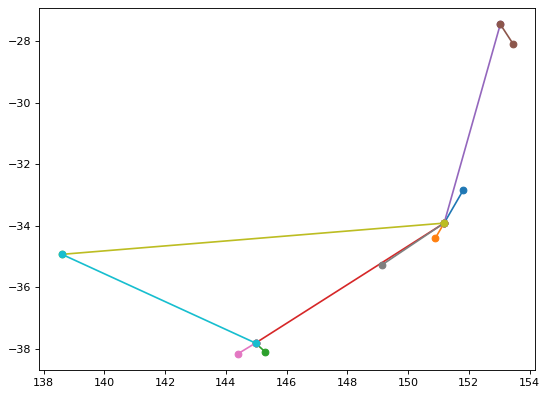

In [17]:
def plotter(df):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    for n in range(0,df.shape[0]):
        plt.plot([df.iloc[n]['lng'],df.iloc[n]['lng_x']],[df.iloc[n]['lat'],df.iloc[n]['lat_x']], marker = 'o')
    plt.show()
plotter(df.head(10))

In [18]:
df.head(10)

level_0  level_0_x                index_x Country Code_x      2016_x  \
0       10        216   Newcastle, Australia            AUS  24127159.0   
1       17        161  Wollongong, Australia            AUS  24127159.0   
2      468         93  Cranbourne, Australia            AUS  24127159.0   
3        1        222   Melbourne, Australia            AUS  24127159.0   
4        4        219    Brisbane, Australia            AUS  24127159.0   
5      907        211  Gold Coast, Australia            AUS  24127159.0   
6      472        167     Geelong, Australia            AUS  24127159.0   
7       14        215    Canberra, Australia            AUS  24127159.0   
8        7        217    Adelaide, Australia            AUS  24127159.0   
9      454        217    Adelaide, Australia            AUS  24127159.0   

       city_x city_ascii_x      lat_x       lng_x      pop_x  country_x  \
0   Newcastle    Newcastle -32.845348  151.815012   816285.5  Australia   
1  Wollongong   Wollongong -34.415381  150.890004   201319.5  Australia   
2  Cranbourne   Cranbourne -38.099601  145.283370   249955.0  Australia   
3   Melbourne    Melbourne -37.820031  144.975016  2131812.5  Australia   
4    Brisbane     Brisbane -27.455031  153.035093  1393176.5  Australia   
5  Gold Coast   Gold Coast -28.081504  153.448246   429954.5  Australia   
6     Geelong      Geelong -38.167495  144.395634   149336.0  Australia   
7    Canberra     Canberra -35.283029  149.129026   280866.0  Australia   
8    Adelaide     Adelaide -34.934988  138.600005   990677.0  Australia   
9    Adelaide     Adelaide -34.934988  138.600005   990677.0  Australia   

  iso2_x iso3_x                    province_x                 index  \
0     AU    AUS               New South Wales     Sydney, Australia   
1     AU    AUS               New South Wales     Sydney, Australia   
2     AU    AUS                      Victoria  Melbourne, Australia   
3     AU    AUS                      Victoria     Sydney, Australia   
4     AU    AUS                    Queensland     Sydney, Australia   
5     AU    AUS                    Queensland   Brisbane, Australia   
6     AU    AUS                      Victoria  Melbourne, Australia   
7     AU    AUS  Australian Capital Territory     Sydney, Australia   
8     AU    AUS               South Australia     Sydney, Australia   
9     AU    AUS               South Australia  Melbourne, Australia   

  Country Code        2016       city city_ascii        lat         lng  \
0          AUS  24127159.0     Sydney     Sydney -33.920011  151.185180   
1          AUS  24127159.0     Sydney     Sydney -33.920011  151.185180   
2          AUS  24127159.0  Melbourne  Melbourne -37.820031  144.975016   
3          AUS  24127159.0     Sydney     Sydney -33.920011  151.185180   
4          AUS  24127159.0     Sydney     Sydney -33.920011  151.185180   
5          AUS  24127159.0   Brisbane   Brisbane -27.455031  153.035093   
6          AUS  24127159.0  Melbourne  Melbourne -37.820031  144.975016   
7          AUS  24127159.0     Sydney     Sydney -33.920011  151.185180   
8          AUS  24127159.0     Sydney     Sydney -33.920011  151.185180   
9          AUS  24127159.0  Melbourne  Melbourne -37.820031  144.975016   

         pop    country iso2 iso3         province  combined_pop     distance  \
0  4135711.0  Australia   AU  AUS  New South Wales     4951996.5   132.819574   
1  4135711.0  Australia   AU  AUS  New South Wales     4337030.5    61.319749   
2  2131812.5  Australia   AU  AUS         Victoria     2381767.5    41.197472   
3  4135711.0  Australia   AU  AUS  New South Wales     6267523.5   708.089911   
4  4135711.0  Australia   AU  AUS  New South Wales     5528887.5   738.282377   
5  1393176.5  Australia   AU  AUS       Queensland     1823131.0    80.486463   
6  2131812.5  Australia   AU  AUS         Victoria     2281148.5    63.855211   
7  4135711.0  Australia   AU  AUS  New South Wales     4416577.0   241.723603   
8  4135711.0  

In [24]:
X=df.head(10)[['index_x','pop_x']]
X.columns=['index','pop']
pd.concat([df.head(10)[['index','pop']],X]).drop_duplicates('index')['pop'].sum()

10779093.5